# ***IMPORTS***

In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [156]:
data=pd.read_csv('Stress-Lysis.csv')
data.head()

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# ***ANALYZING THE DATA***

In [157]:
data.shape  # returns a tuple of array dimension that specifies the number of rows and columns

(2001, 4)

In [158]:
data.info()  # prints the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step_count    2001 non-null   int64  
 3   Stress_Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [159]:
data.describe()  # returns the statistical summary of the data

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


# ***DATA CLEANING***

***STEPS:***

***1. Analyze the numerical and categorical features, and convert categorical feature into numerical.***

Stress Level
0 - Low stress
1 - Normal stress
2 - High Stress

In [160]:
data['Stress_Level'].unique()

array([1, 2, 0], dtype=int64)

***2. Check for missing values and handle them.***

In [161]:
data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

***3.Check for duplicate values***

In [162]:
data.duplicated().sum()

0

# ***EDA - EXPLORATORY DATA ANALYSIS***

***1.Univariate Non-Graphical***

***Check for outliers. If present try to handle them.***

In [163]:
data.skew()

Humidity        1.179993e-18
Temperature    -1.297993e-17
Step_count     -6.998237e-03
Stress_Level   -1.811032e-01
dtype: float64

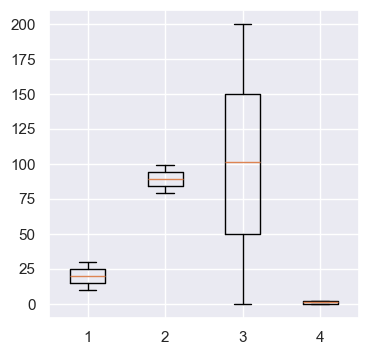

In [164]:
plt.figure(figsize=(4,4))
plt.boxplot(data)
plt.show()

All 4 columns consists skewness.

***Skewness Reduction***

In [165]:
# Logarithmic Transformation
hum_log = np.log(data['Humidity'])
h = round(hum_log.skew(),10)
print(h)

-0.3790364332


In [166]:
# SquareRoot Transformation
temp_sqrt = np.sqrt(data['Temperature'])
temp_sqrt.skew()
t = round(temp_sqrt.skew(),10)
print(t)

-0.0390881104


In [167]:
quantile1=data["Step_count"].quantile(0.25)
quantile2=data["Step_count"].quantile(0.75)

In [168]:
quantile1

50.0

In [169]:
quantile2

150.0

In [170]:
data["Step_count"]=np.where(data["Step_count"]<quantile1,quantile1,data["Step_count"])
data["Step_count"]=np.where(data["Step_count"]>quantile2,quantile2,data["Step_count"])

In [171]:
s = round(data['Step_count'].skew(),10)
print(s)

-0.0094975784


In [172]:
# SquareRoot Transformation
stress_sqrt = np.sqrt(data['Stress_Level'])
sl = round(stress_sqrt.skew(),10)
print(sl)

-0.7944935599


***2.Univariate Graphical***

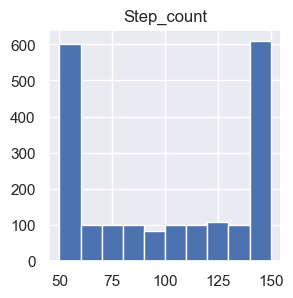

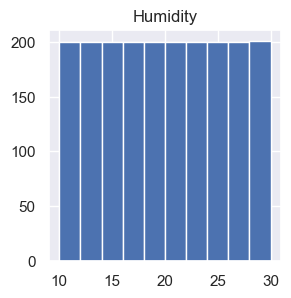

In [173]:
column=['Step_count','Humidity']
for category in column:
    plt.figure(figsize=(3,3))
    plt.hist(data[category])
    plt.title(category)
    plt.show()

<Axes: xlabel='Stress_Level', ylabel='Count'>

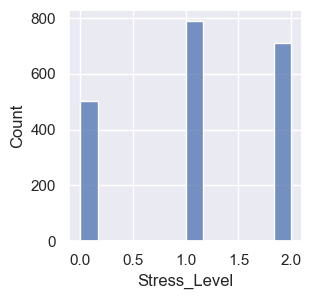

In [174]:
# histplot (categorical) 
plt.figure(figsize=(3,3))
sns.set(font_scale=1)
sns.histplot(data=data, x='Stress_Level')

<Axes: ylabel='Temperature'>

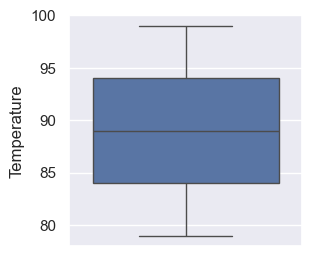

In [175]:
plt.figure(figsize=(3,3))
sns.boxplot(data['Temperature'])

***3.Multivariate Non-Graphical***

In [176]:
correlation = data.corr()
correlation

,Humidity,Temperature,Step_count,Stress_Level
Humidity,1.000000,1.000000,0.902053,0.936036
Temperature,1.000000,1.000000,0.902053,0.936036
Step_count,0.902053,0.902053,1.000000,0.859096
Stress_Level,0.936036,0.936036,0.859096,1.000000


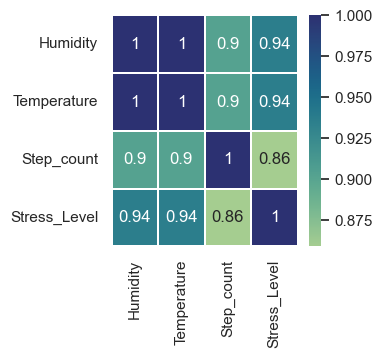

In [177]:
plt.figure(figsize=(3,3))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

***4.Multivariate Graphical***

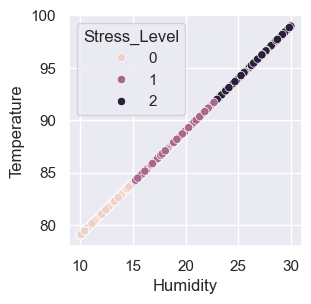

In [178]:
plt.figure(figsize=(3,3))
sns.scatterplot(x='Humidity',y='Temperature',hue='Stress_Level',data=data)
plt.show()

# ***MODELLING***

In [179]:
from sklearn.model_selection import train_test_split
X=data.drop(['Stress_Level'],axis=1)
y=data['Stress_Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

***LOGISTIC REGRESSION***

In [180]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(C=1.0,random_state=2)
regressor.fit(X_train,y_train)

LogisticRegression(random_state=2)

In [181]:
from sklearn.metrics import accuracy_score, confusion_matrix
prediction = regressor.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   1 151]]


In [182]:
print(accuracy_score(y_test,prediction))

0.9975062344139651


***RANDOM FOREST CLASSIFICATION***

In [183]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
model.fit(X,y)
prediction = model.predict(X_test)
confusionmatrix = confusion_matrix(y_test,prediction)
print(confusionmatrix)

[[ 83   0   0]
 [  0 166   0]
 [  0   0 152]]


In [184]:
print(accuracy_score(y_test,prediction))

1.0


***SUPPORT VECTOR MACHINE***

In [185]:
from sklearn.preprocessing import StandardScaler
standardscalar = StandardScaler()
X_train = standardscalar.fit_transform(X_train)
X_test = standardscalar.transform(X_train)

C:\Users\aryan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [186]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [187]:
X_test = X_test[:401]
y_predict = y_predict[:401]


In [188]:
y_predict= classifier.predict(X_test)
score=accuracy_score(y_test,y_predict)
print(score)

0.20698254364089774


# ***DEPLOYMENT***

***SAVING THE TRAINED MODEL***

In [189]:
import pickle

In [190]:
filename = 'stress_trained.sav'
pickle.dump(classifier,open(filename,'wb'))

***LOADING THE TRAINED MODEL***

In [191]:
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Download the stress_trained.sav model 

In [201]:
# Evaluating

input_data = (11.05,80.05,14) #300
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (21.38,90.38,128) #100
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")
    
input_data = (18.62,87.62,43) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = classifier.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH
[2]
Stress Level: HIGH
[2]
Stress Level: HIGH


In [198]:
# File - Predictive System.py

# Imports
import numpy as np
import pickle

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# stress_trained.sav - replace the path of the file along with the file name
# Example: loaded_model = pickle.load(open('C:/Users/jeyasri/Downloads/PROJECT/stress_trained.sav','rb'))



input_data = (18.62,87.62,43) #200
#changing the input data into numpy array
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction = loaded_model.predict(id_reshaped)
print(prediction)

if(prediction[0]==0):
    print("Stress Level: LOW")
elif(prediction[0]==1):
    print("Stress Level: MEDIUM")
else:
    print("Stress Level: HIGH")

[2]
Stress Level: HIGH


In [194]:
import numpy as np
import pickle
import streamlit as st  

# Loading the trained model
loaded_model = pickle.load(open('stress_trained.sav','rb'))
# Replace path over stress_trained.sav

def stresslevel_prediction(input_data):
    
    #changing the input data into numpy array
    id_np_array = np.asarray(input_data)
    id_reshaped = id_np_array.reshape(1,-1)

    prediction = loaded_model.predict(id_reshaped)
    print(prediction)

    if(prediction[0]==0):
        return "Stress Level: LOW"
    elif(prediction[0]==1):
        return "Stress Level: MEDIUM"
    else:
        return "Stress Level: HIGH"
    
def main():
    
    st.title('STRESS LEVEL PREDICTION WEB APP')
    
    Humidity = st.text_input('Humidity Value')
    Temperature = st.text_input('Body Temperature')
    Step_count = st.text_input('Number of Steps')
    
    # Prediction code
    diagnosis = ''
    
    if st.button('PREDICT'):
        diagnosis = stresslevel_prediction([Humidity, Temperature, Step_count])
        
    st.success(diagnosis)
    
if __name__=='__main__':
    main()

**Go to command prompt open the terminal and execute the command.**

streamlit run "path of the file.py"

Example: streamlit run "C:\Users\jeyasri\Downloads\PROJECT\Stress Level Prediction Web App.py"

**Your final result will be like this...**

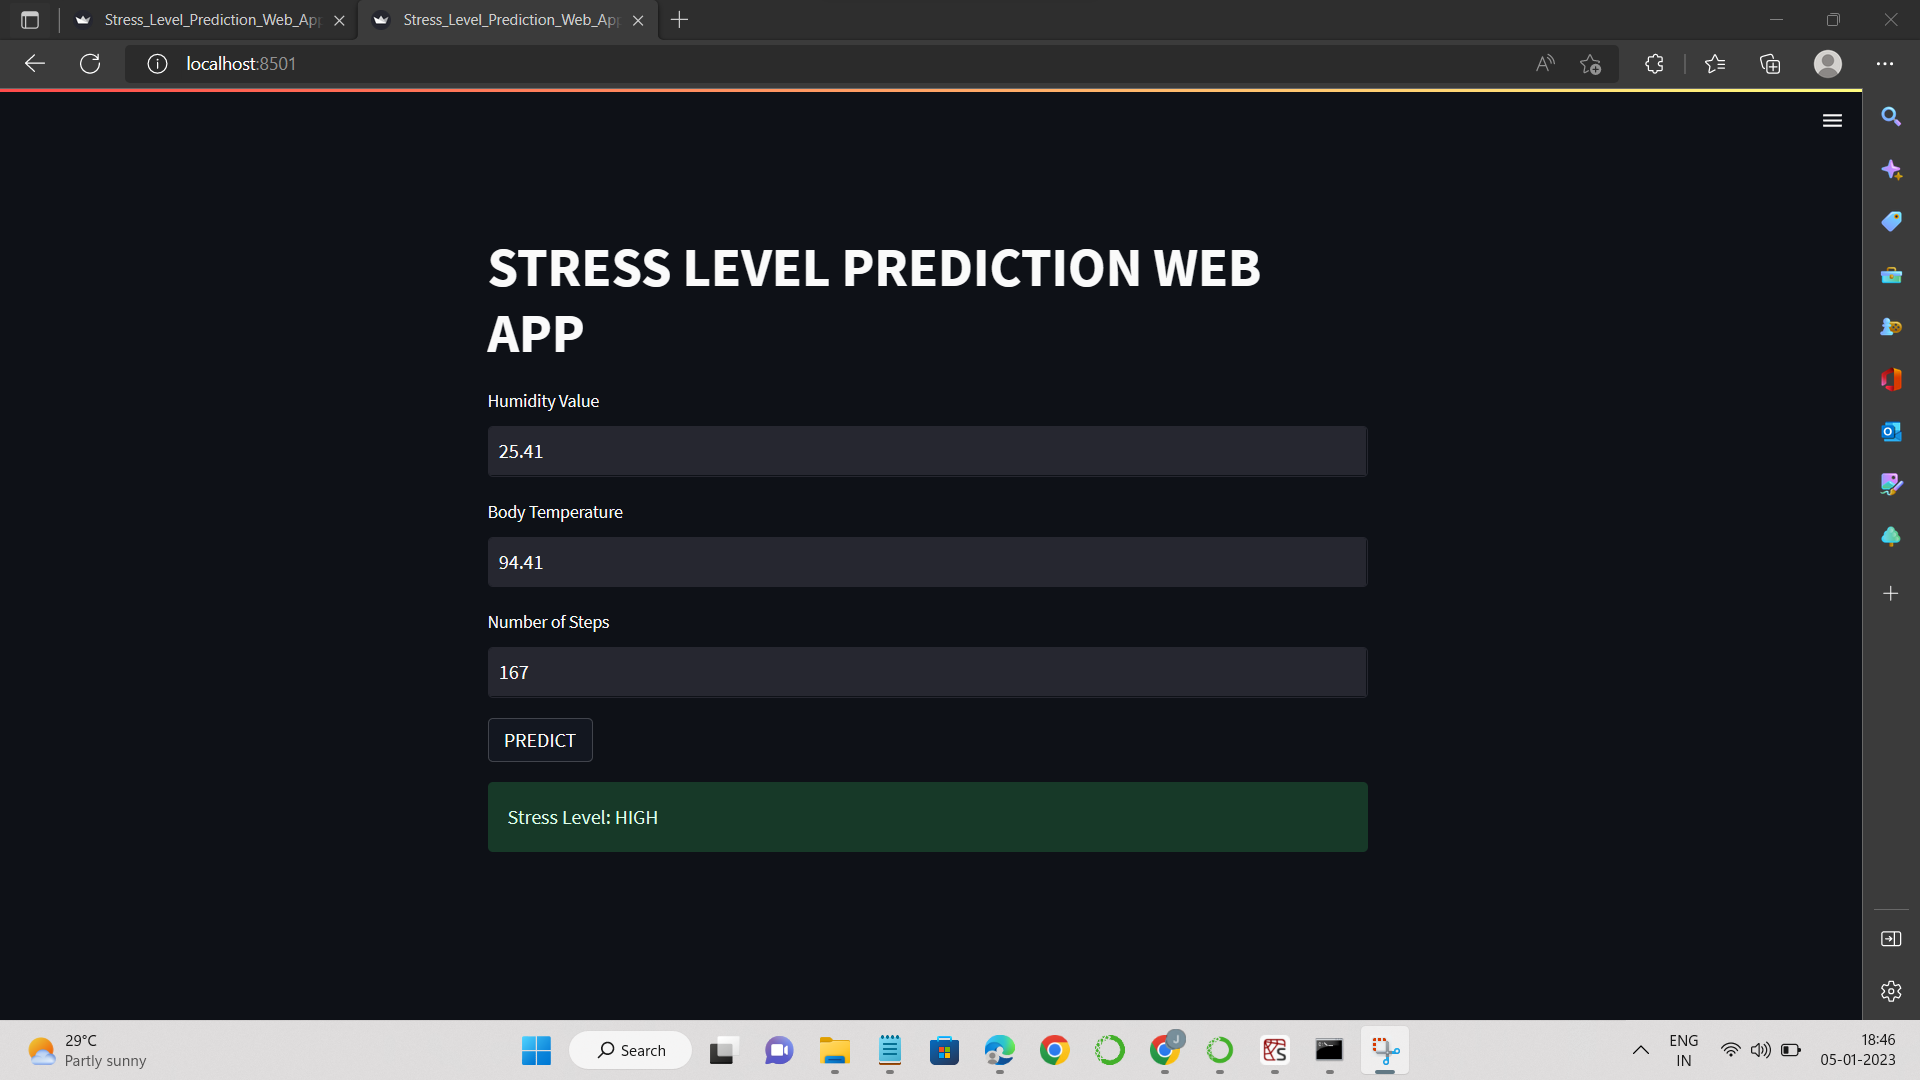